In [1]:
import tensorflow as tf

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [38]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
import matplotlib.pyplot as plt

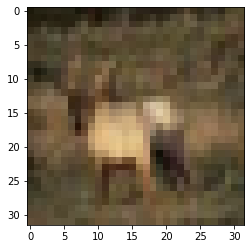

In [8]:
image=X_train[3]
plt.imshow(image)
plt.show()

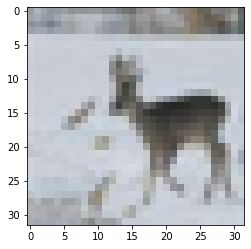

In [9]:
image=X_train[20]
plt.imshow(image)
plt.show()

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding="same",
                          activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(63, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")]
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 63)        18207     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 63)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4032)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               403300    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1

In [19]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir = "TB",
    expand_nested=True,
    dpi=96
)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [20]:
model.compile(optimizer="adam", 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [61]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks=[EarlyStopping(patience=5)]

In [23]:
history = model.fit(X_train, y_train, epochs = 20, 
                    validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/20


C:\Users\rashi\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


1563/1563 [==============================] - 40s 25ms/step - loss: 1.3490 - accuracy: 0.5204 - val_loss: 1.1155 - val_accuracy: 0.6078
Epoch 2/20
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9970 - accuracy: 0.6507 - val_loss: 0.9872 - val_accuracy: 0.6565
Epoch 3/20
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8609 - accuracy: 0.6986 - val_loss: 0.9391 - val_accuracy: 0.6755
Epoch 4/20
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7621 - accuracy: 0.7341 - val_loss: 0.8565 - val_accuracy: 0.7036
Epoch 5/20
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6796 - accuracy: 0.7625 - val_loss: 0.8668 - val_accuracy: 0.7039
Epoch 6/20
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6040 - accuracy: 0.7892 - val_loss: 0.8831 - val_accuracy: 0.7119


In [24]:
import pandas as pd
met_df = pd.DataFrame(history.history)

In [25]:
met_df

,loss,accuracy,val_loss,val_accuracy
0,1.349003,0.52044,1.115549,0.6078
1,0.997036,0.65068,0.987221,0.6565
2,0.860923,0.69862,0.939140,0.6755
3,0.762106,0.73406,0.856480,0.7036
4,0.679551,0.76246,0.866766,0.7039
5,0.604024,0.78916,0.883146,0.7119


<AxesSubplot:>

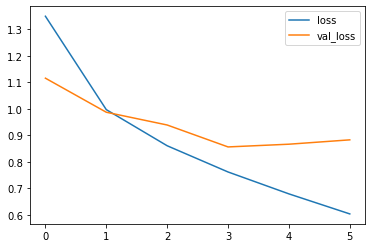

In [27]:
met_df[["loss", "val_loss"]].plot()

<AxesSubplot:>

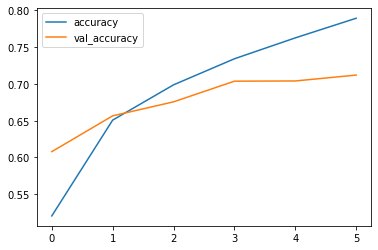

In [29]:
met_df[["accuracy", "val_accuracy"]].plot()

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding="valid",
                          activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3, 3), padding="valid", activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")]
)

In [36]:
model.compile(optimizer="adam", 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [37]:
history = model.fit(X_train, y_train, epochs = 50, 
                    validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/50
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4570 - accuracy: 0.4717 - val_loss: 1.1903 - val_accuracy: 0.5817
Epoch 2/50
1563/1563 [==============================] - 29s 18ms/step - loss: 1.0877 - accuracy: 0.6130 - val_loss: 1.0018 - val_accuracy: 0.6475
Epoch 3/50
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9452 - accuracy: 0.6674 - val_loss: 0.9689 - val_accuracy: 0.6627
Epoch 4/50
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8387 - accuracy: 0.7040 - val_loss: 0.9296 - val_accuracy: 0.6859
Epoch 5/50
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7619 - accuracy: 0.7324 - val_loss: 0.9264 - val_accuracy: 0.6822
Epoch 6/50
1563/1563 [==============================] - 29s 18ms/step - loss: 0.6997 - accuracy: 0.7548 - val_loss: 0.8613 - val_accuracy: 0.7059
Epoch 7/50
1563/1563 [==============================] - 29s 18ms/step - loss: 0.6406 - accuracy: 0.7750 - val_loss: 0.8845 -

In [107]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding="valid",
                          activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    
    tf.keras.layers.Conv2D(48, (3, 3), padding="valid", activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    
    tf.keras.layers.Conv2D(48, (3, 3), padding="valid", activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")]
)

In [109]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 13, 13, 48)        13872     
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 6, 6, 48)          0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 4, 4, 48)          20784     
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 2, 2, 48)          0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 192)             

In [78]:
model.compile(optimizer="adam", 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

In [79]:
history = model.fit(X_train, y_train, epochs = 50, 
                    validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5905 - accuracy: 0.4057 - val_loss: 1.3958 - val_accuracy: 0.4917
Epoch 2/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2437 - accuracy: 0.5521 - val_loss: 1.1319 - val_accuracy: 0.5921
Epoch 3/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0986 - accuracy: 0.6078 - val_loss: 1.0879 - val_accuracy: 0.6211
Epoch 4/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9859 - accuracy: 0.6506 - val_loss: 1.0199 - val_accuracy: 0.6409
Epoch 5/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9093 - accuracy: 0.6768 - val_loss: 0.9593 - val_accuracy: 0.6722
Epoch 6/50
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8522 - accuracy: 0.7003 - val_loss: 0.9180 - val_accuracy: 0.6815
Epoch 7/50
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8009 - accuracy: 0.7162 - val_loss: 0.8761 -

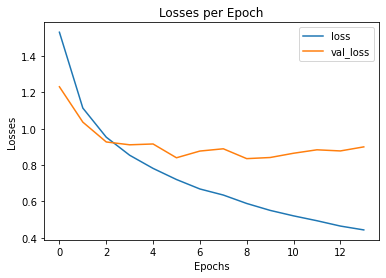

In [111]:
met_df1 = pd.DataFrame(history.history)
met_df1[["loss", "val_loss"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Losses per Epoch")
plt.show()

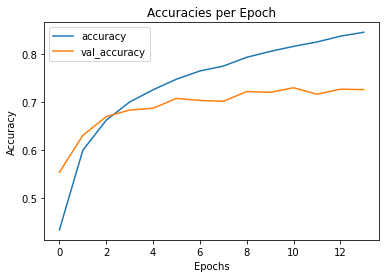

In [112]:
met_df1[["accuracy", "val_accuracy"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracies per Epoch")
plt.show()

In [110]:
met_df1

,loss,accuracy,val_loss,val_accuracy
0,1.590515,0.40570,1.395849,0.4917
1,1.243665,0.55214,1.131878,0.5921
2,1.098627,0.60776,1.087920,0.6211
3,0.985875,0.65062,1.019866,0.6409
4,0.909281,0.67682,0.959277,0.6722
5,0.852169,0.70028,0.918023,0.6815
6,0.800939,0.71622,0.876056,0.6946
7,0.757603,0.73230,0.884173,0.6964
8,0.723081,0.74468,0.910624,0.6880
9,0.688798,0.75750,0.937719,0.6762


In [83]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding="valid",
                          activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(48, (3, 3), padding="valid", activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(48, (3, 3), padding="valid", activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")]
)

In [84]:
model.compile(optimizer="adam", 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [85]:
history = model.fit(X_train, y_train, epochs = 50, 
                    validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/50


C:\Users\rashi\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


1563/1563 [==============================] - 32s 20ms/step - loss: 1.6091 - accuracy: 0.4003 - val_loss: 1.3563 - val_accuracy: 0.5071
Epoch 2/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2610 - accuracy: 0.5466 - val_loss: 1.3181 - val_accuracy: 0.5309
Epoch 3/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1152 - accuracy: 0.6014 - val_loss: 1.1185 - val_accuracy: 0.6042
Epoch 4/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0157 - accuracy: 0.6381 - val_loss: 1.0263 - val_accuracy: 0.6425
Epoch 5/50
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9456 - accuracy: 0.6653 - val_loss: 1.0404 - val_accuracy: 0.6400
Epoch 6/50
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8889 - accuracy: 0.6853 - val_loss: 0.9512 - val_accuracy: 0.6715
Epoch 7/50
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8354 - accuracy: 0.7065 - val_loss: 0.9375 - val_accura

<AxesSubplot:>

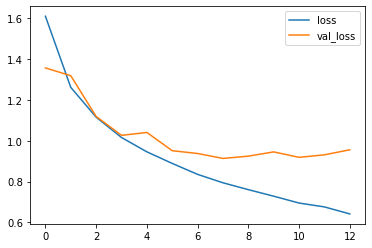

In [86]:
met_df2 = pd.DataFrame(history.history)
met_df2[["loss", "val_loss"]].plot()

<AxesSubplot:>

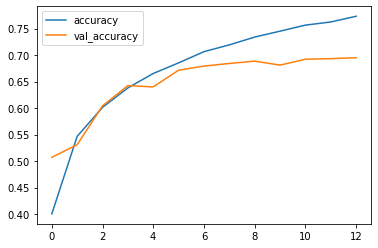

In [87]:
met_df2[["accuracy", "val_accuracy"]].plot()

In [93]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding="same",
                          activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    
    tf.keras.layers.Conv2D(48, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    
    tf.keras.layers.Conv2D(48, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")]
)

In [94]:
model.compile(optimizer="adam", 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

In [95]:
history = model.fit(X_train, y_train, epochs = 50, 
                    validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/50
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4809 - accuracy: 0.4595 - val_loss: 1.1717 - val_accuracy: 0.5811
Epoch 2/50
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0611 - accuracy: 0.6234 - val_loss: 0.9933 - val_accuracy: 0.6522
Epoch 3/50
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9040 - accuracy: 0.6815 - val_loss: 0.9448 - val_accuracy: 0.6754
Epoch 4/50
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8106 - accuracy: 0.7158 - val_loss: 0.8578 - val_accuracy: 0.7005
Epoch 5/50
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7339 - accuracy: 0.7415 - val_loss: 0.8524 - val_accuracy: 0.7054
Epoch 6/50
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6823 - accuracy: 0.7628 - val_loss: 0.8229 - val_accuracy: 0.7181
Epoch 7/50
1563/1563 [==============================] - 43s 28ms/step - loss: 0.6290 - accuracy: 0.7799 - val_loss: 0.8342 -

<AxesSubplot:>

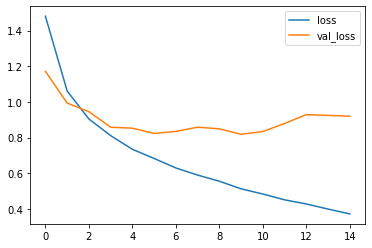

In [96]:
met_df3 = pd.DataFrame(history.history)
met_df3[["loss", "val_loss"]].plot()

<AxesSubplot:>

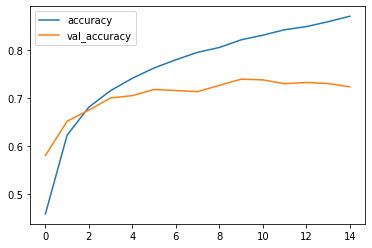

In [97]:
met_df3[["accuracy", "val_accuracy"]].plot()

In [98]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (2, 4), padding="same",
                          activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    
    tf.keras.layers.Conv2D(48, (3, 2), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    
    tf.keras.layers.Conv2D(48, (3, 2), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")]
)

In [100]:
model.compile(optimizer="adam", 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

In [101]:
history = model.fit(X_train, y_train, epochs = 50, 
                    validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/50
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5312 - accuracy: 0.4348 - val_loss: 1.2310 - val_accuracy: 0.5543
Epoch 2/50
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1137 - accuracy: 0.5999 - val_loss: 1.0363 - val_accuracy: 0.6307
Epoch 3/50
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9535 - accuracy: 0.6622 - val_loss: 0.9271 - val_accuracy: 0.6696
Epoch 4/50
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8540 - accuracy: 0.6999 - val_loss: 0.9115 - val_accuracy: 0.6832
Epoch 5/50
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7816 - accuracy: 0.7252 - val_loss: 0.9160 - val_accuracy: 0.6870
Epoch 6/50
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7203 - accuracy: 0.7471 - val_loss: 0.8400 - val_accuracy: 0.7073
Epoch 7/50
1563/1563 [==============================] - 35s 22ms/step - loss: 0.6682 - accuracy: 0.7642 - val_loss: 0.8770 -

<AxesSubplot:>

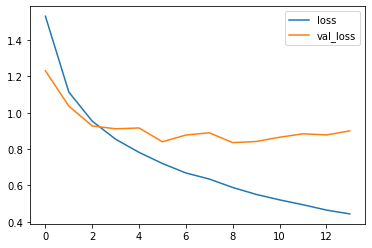

In [102]:
met_df4 = pd.DataFrame(history.history)
met_df4[["loss", "val_loss"]].plot()

<AxesSubplot:>

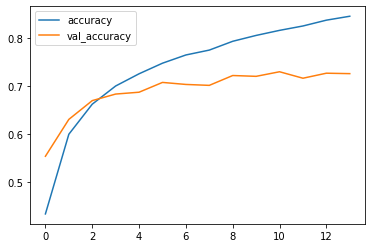

In [103]:
met_df4[["accuracy", "val_accuracy"]].plot()